In [1]:
import numpy as np
import pandas as pd

def gbm(n_years = 10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of Geometric Brownian Motion trajectories, such as for Stock Prices
    :param n_years:  The number of years to generate data for
    :param n_paths: The number of scenarios/trajectories
    :param mu: Annualized Drift, e.g. Market Return
    :param sigma: Annualized Volatility
    :param steps_per_year: granularity of the simulation
    :param s_0: initial value
    :return: a numpy array of n_paths columns and n_years*steps_per_year rows
    """
    # Derive per-step Model Parameters from User Specifications
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    # convert to a DataFrame
    rets = pd.DataFrame(rets)
    # convert to prices
    prices = s_0*(rets+1).cumprod()
    return prices

In [2]:
p=gbm(10,n_scenarios=3)

In [3]:
p.shape

(120, 3)

In [4]:
p.head()

,0,1,2
0,104.783834,97.716128,106.312321
1,101.616601,98.635925,100.331121
2,95.940296,98.813550,105.113546
3,106.952420,92.416311,105.245687
4,110.189950,84.973670,105.044834


<AxesSubplot: >

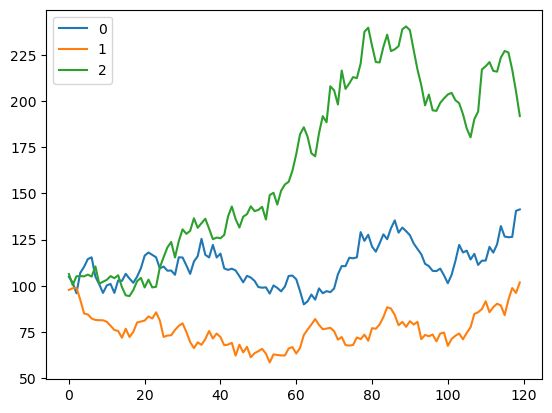

In [5]:
p.plot()

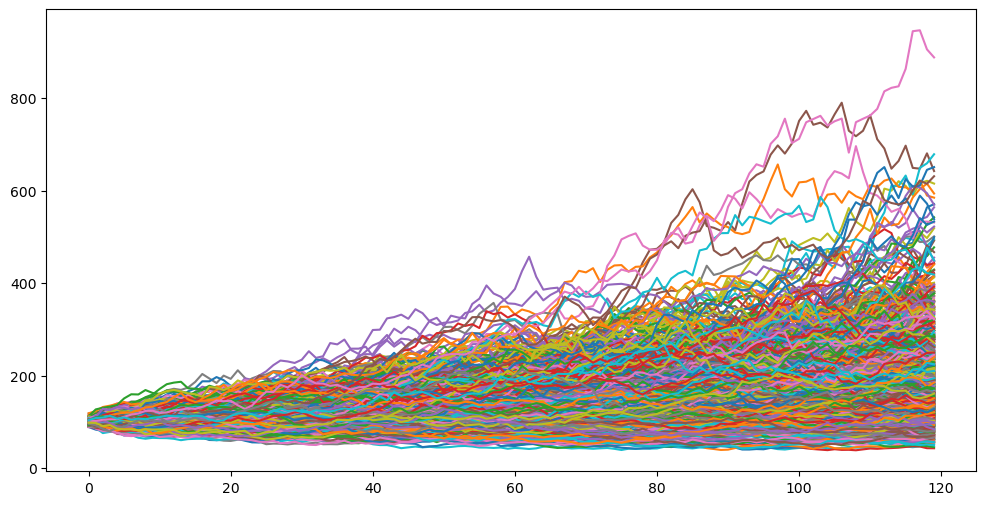

In [6]:
p=gbm(n_years=10, n_scenarios=1000).plot(figsize=(12, 6),legend=False)

In [7]:
import numpy as np
import pandas as pd

def gbm1(n_years = 10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of Geometric Brownian Motion trajectories, such as for Stock Prices
    :param n_years:  The number of years to generate data for
    :param n_paths: The number of scenarios/trajectories
    :param mu: Annualized Drift, e.g. Market Return
    :param sigma: Annualized Volatility
    :param steps_per_year: granularity of the simulation
    :param s_0: initial value
    :return: a numpy array of n_paths columns and n_years*steps_per_year rows
    """
    # Derive per-step Model Parameters from User Specifications
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt),scale=(sigma*np.sqrt(dt)),size=(n_steps, n_scenarios))
    
    # convert to prices
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [9]:
%timeit gbm(n_years=5,n_scenarios=1000)

3 ms ± 443 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%timeit gbm1(n_years=5,n_scenarios=1000)

2.92 ms ± 256 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<AxesSubplot: >

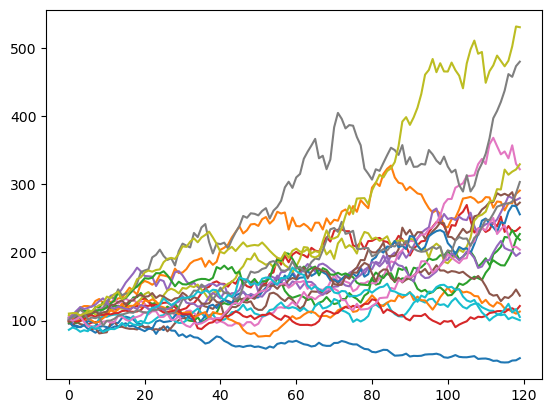

In [13]:
gbm(n_years=10,n_scenarios=20).plot(legend=False)

In [14]:
def gbm1(n_years = 10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of Geometric Brownian Motion trajectories, such as for Stock Prices
    :param n_years:  The number of years to generate data for
    :param n_paths: The number of scenarios/trajectories
    :param mu: Annualized Drift, e.g. Market Return
    :param sigma: Annualized Volatility
    :param steps_per_year: granularity of the simulation
    :param s_0: initial value
    :return: a numpy array of n_paths columns and n_years*steps_per_year rows
    """
    # Derive per-step Model Parameters from User Specifications
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt),scale=(sigma*np.sqrt(dt)),size=(n_steps, n_scenarios))
    rets_plus_1[0]=1
    # convert to prices
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

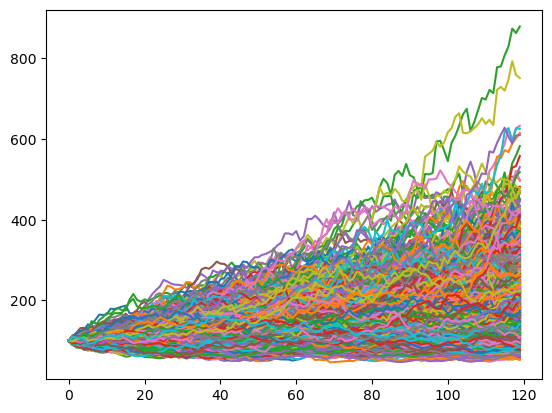

In [16]:
p=gbm1(n_years=10,n_scenarios=1000).plot(legend=False)